In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "https://raw.githubusercontent.com/KanoonGammy/Project-Tools/refs/heads/main/Cleaned_Data.csv"
data = pd.read_csv(path)
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data = data[~data.index.duplicated()]

In [4]:
northern_provinces = [
        'Chiang Rai', 'Chiang Mai', 'Nan', 'Phayao', 'Phrae',
        'Mae Hong Son', 'Lampang', 'Lamphun', 'Uttaradit'
    ]
central_provinces = [
        'Bangkok', 'Nakhon Pathom', 'Nonthaburi', 'Sukhothai','Kamphaeng Phet',
        'Pathum Thani', 'Lopburi', 'Nakhon Sawan','Phichit',
        'Samut Prakan', 'Samut Songkhram', 'Samut Sakhon', 'Saraburi',
        'Suphan Buri', 'Phra Nakhon Si Ayutthaya',  'Uthai Thani',
        'Phitsanulok' , 'Phetchabun'
    ]
northeastern_provinces = [
        'Khon Kaen', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Buriram',
        'Mukdahan', 'Sakon Nakhon', 'Nong Khai', 'Udon Thani',
        'Ubon Ratchathani', 'Loei'
    ]

eastern_provinces = [
        'Chanthaburi', 'Chachoengsao', 'Chonburi', 'Trat',
        'Rayong', 'Prachin Buri', 'Sa Kaeo'
    ]

western_provinces = [
        'Kanchanaburi', 'Tak', 'Prachuap Khiri Khan', 'Ratchaburi',
    ]

southern_provinces = [
        'Trang', 'Nakhon Si Thammarat', 'Narathiwat', 'Phuket',
        'Yala', 'Songkhla', 'Satun', 'Surat Thani'
    ]
All = northern_provinces + central_provinces+ northeastern_provinces + eastern_provinces + western_provinces + southern_provinces

dict_region = { "All": All,
                "Northern": northern_provinces,
                "Central": central_provinces,
                "Northeastern": northeastern_provinces,
                "Eastern": eastern_provinces,
                "Western": western_provinces,
                "Southern": southern_provinces,
                 }

In [13]:
def boxplot_PM(data, region = 'All', start = "2021"):
    plt.style.use('seaborn-v0_8-bright')
    print("Region: " , dict_region.keys())
    plt.figure(figsize = (30,12))
    def plot_bg():
        ax = plt.gca()
        ax.axhspan(75.1, plt.ylim()[1] , facecolor='red', alpha=0.3, label='Affecting Health')
        ax.axhspan(37.6, 75.0, facecolor='orange', alpha=0.3, label='Starting to affect Health')
        ax.axhspan(25.1, 37.5, facecolor='yellow', alpha=0.3, label='Moderate')
        ax.axhspan(15.1, 25, facecolor='green', alpha=0.3, label='Good')
        ax.axhspan(0, 15, facecolor='cyan', alpha=0.3, label='Excellent')

        plt.legend(loc = 'center right')
        plt.xticks(rotation = 90)
        plt.show()
    df = data.copy()
    df = df[start:]
    data_boxplot = df[dict_region[region]].dropna().ffill().resample("W").mean()
    data_boxplot.boxplot(vert= True)
    plt.title(f"\nAll Region\n" if region == 'All' else f"\n{region}\n", fontsize = 20)
    plot_bg()

Region:  dict_keys(['All', 'Northern', 'Central', 'Northeastern', 'Eastern', 'Western', 'Southern'])


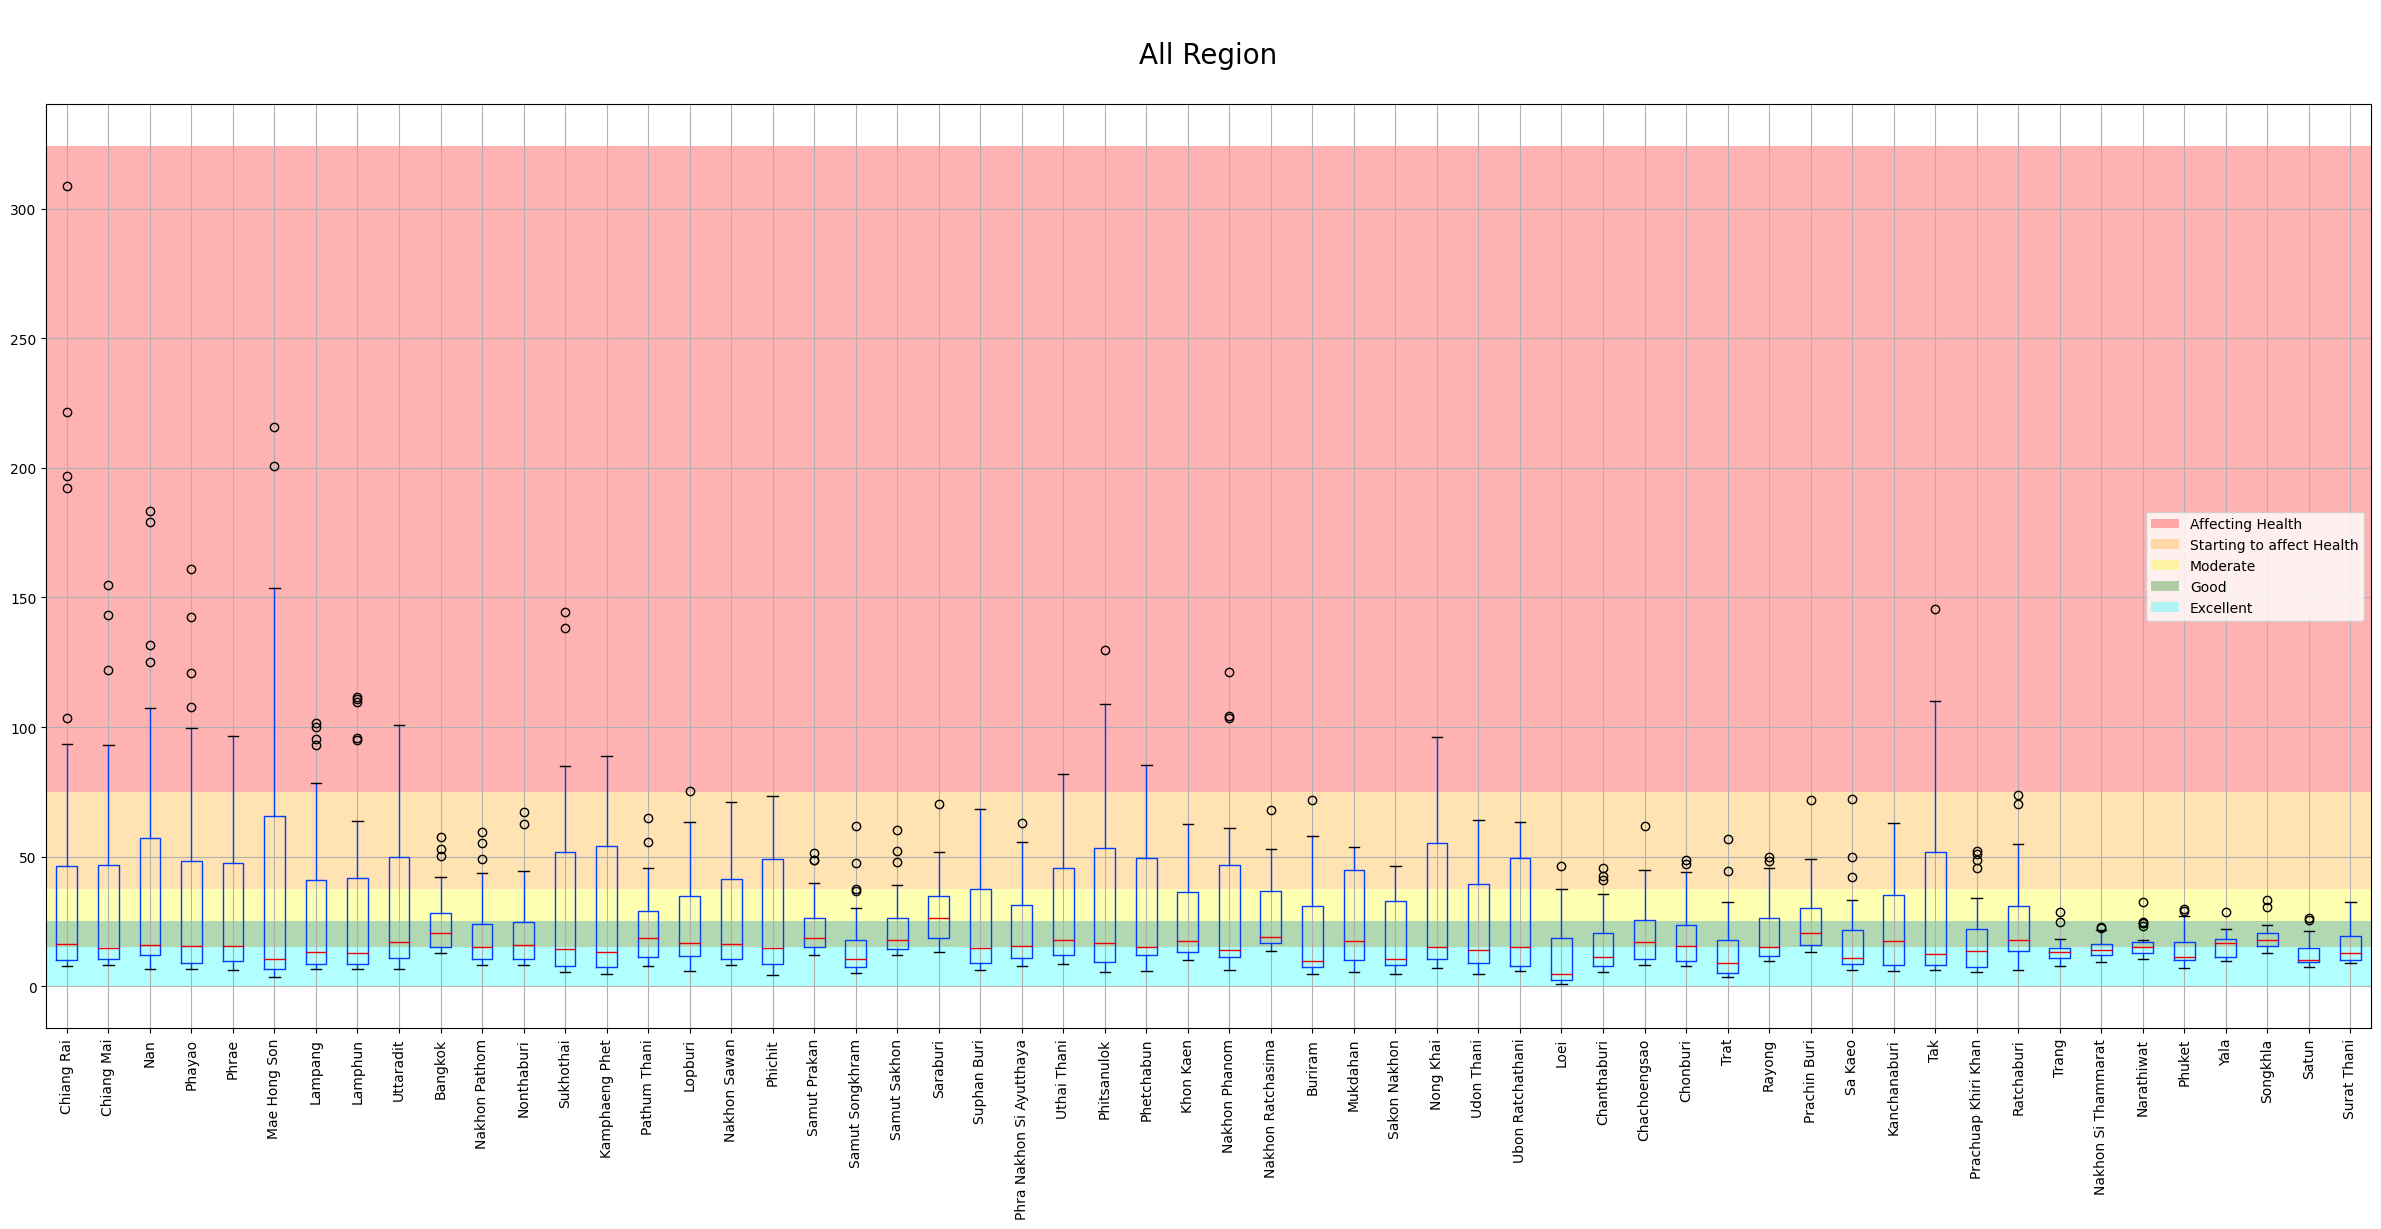

In [14]:
boxplot_PM(data, region = 'All', start = '2018')

In [5]:
def correlation_dendogram(data, region = 'All', rotation_x = 90, side = 'top'):
    print("Region: " , dict_region.keys())
    print("Side: ", ["top", 'left', 'right', 'bottom'])
    try:
        df = data.copy()
        from scipy.cluster.hierarchy import dendrogram, linkage
        if df.index.dtype != 'datetime64[ns]':
            raise  TypeError("Data index is not 'datetime64[ns]")
        df_corr = df[dict_region[region]].dropna()
        corr_change = df_corr#.pct_change()
        corr = corr_change.corr()
        linked = linkage(corr,'ward')
        labelList = df_corr.columns.to_list()

        plt.figure(figsize = (10,6))
        dendrogram(linked,
                orientation = side,
                distance_sort = 'ascending',
                show_leaf_counts = True,
                show_contracted = True,
                labels = labelList)
        name = "Thailand" if region == 'All' else region
        plt.title(f"{name} Dendrogram")
        # plt.xlabel('Province')
        # plt.ylabel('distance')
        plt.xticks(rotation = rotation_x)
        # plt.xticks()#fonsize = 20)
        plt.show()

    except Exception as e:
        print(e)

Region:  dict_keys(['All', 'Northern', 'Central', 'Northeastern', 'Eastern', 'Western', 'Southern'])
Side:  ['top', 'left', 'right', 'bottom']


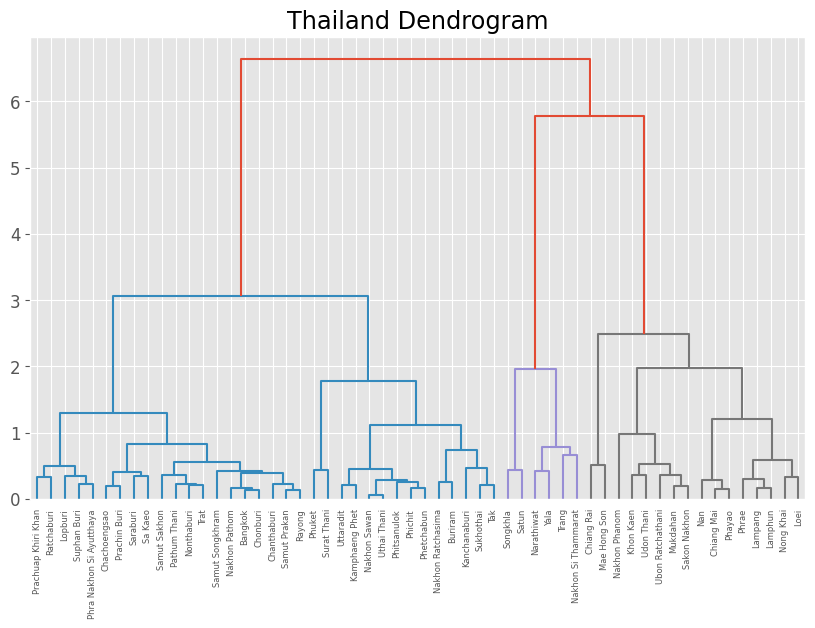

In [32]:
correlation_dendogram(data = data, region = 'All', rotation_x = 90, side = 'top' )

<Axes: title={'center': '\nPM 2.5 Comparison: Mae Hong Son, Chiang Mai, Chiang Rai, Lopburi, and Satun (2021-2023)\n'}, xlabel='Date'>

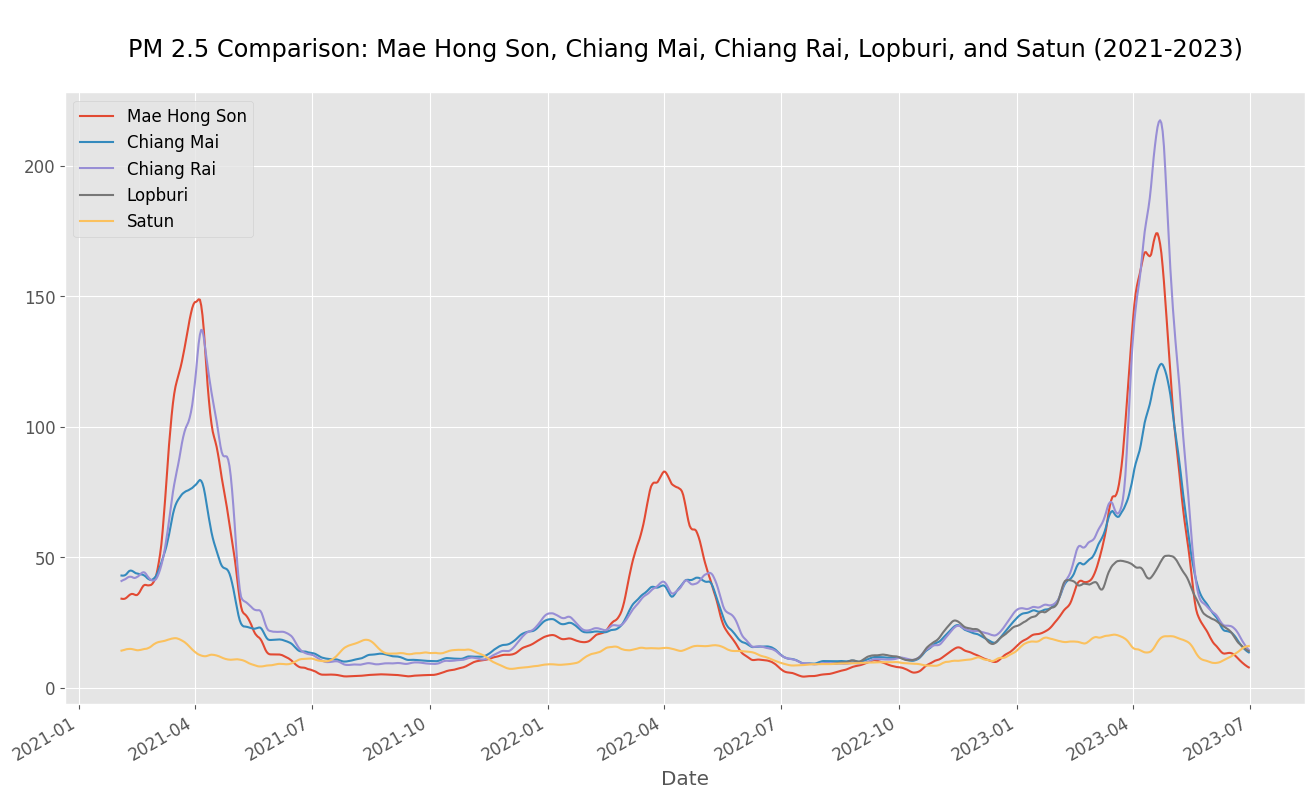

In [33]:
plt.rcParams['figure.figsize'] = [16,9]
data[['Mae Hong Son', 'Chiang Mai', 'Chiang Rai','Lopburi','Satun']].ffill().rolling(30).mean().rolling(5).mean().plot(title = "\nPM 2.5 Comparison: Mae Hong Son, Chiang Mai, Chiang Rai, Lopburi, and Satun (2021-2023)\n")

In [34]:
def corr_matrix(data, region = 'Northeastern', set_pro = [], annot_size = 10):
    print("Region: " , dict_region.keys())
    df = data.copy()
    if set_pro != '':
        corr = df.dropna()[set_pro].corr()
    else:
        corr = df.dropna()[dict_region[region]].corr()
    plt.figsize = (15,9)
    sns.heatmap(corr , cmap = 'coolwarm' ,
                xticklabels = corr.columns ,
                yticklabels = corr.columns ,
                annot = True if region != 'All' else False ,
                annot_kws= {"size": annot_size}, cbar =  False,
                square = True                )
    plt.xticks(fontsize = 5)
    plt.yticks(fontsize = 5)
    plt.show()

Region:  dict_keys(['All', 'Northern', 'Central', 'Northeastern', 'Eastern', 'Western', 'Southern'])


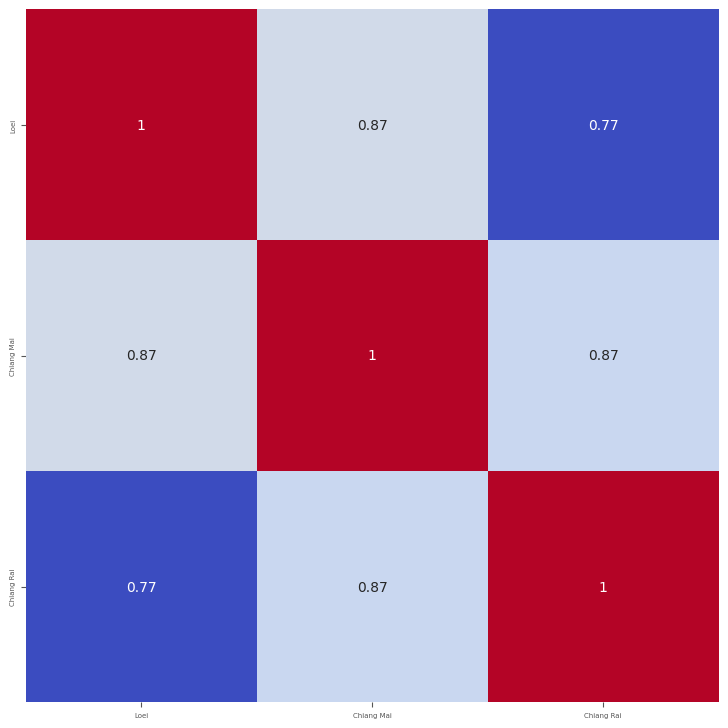

In [35]:
corr_matrix(data, region = 'Central', set_pro = ['Loei', 'Chiang Mai', 'Chiang Rai'])

In [10]:
def heatmap_PM(data, province = 'Bangkok', start = "2021", period = 'W', shrink = 0.5, annot_size = 12):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from matplotlib.colors import ListedColormap, BoundaryNorm

    df = data.copy()
    df = df[start:]
    df['Month'] = df.index.month
    df['Week'] = df.index.strftime("%W")
    df['Week'] = df['Week'].astype(int) +1
    df['Year'] = df.index.year

    if period == 'W':
        df_plot = df.groupby(['Year',"Week",]).mean().reset_index().pivot(index = 'Year', columns = 'Week', values = f'{province}')
        df_plot.loc["Average"] = df_plot.mean(axis = 0)
    if period == 'M':
        df_plot = df.groupby(['Year',"Month",]).mean().reset_index().pivot(index = 'Year', columns = 'Month', values = f'{province}')
        df_plot.loc["Average"] = df_plot.mean(axis = 0)

    period_dict = {'W': 'Weekly', 'M': 'Monthly'}
    import seaborn as sns
    plt.figure(figsize=(20,15))
    plt.title(f"{period_dict[period]} PM 2.5 Levels in {province}", fontsize = 16)
    plt.xlabel(f"{period}", fontsize = 12)
    plt.ylabel("Year", fontsize = 12)

    cmap = ListedColormap(['cyan','green', 'yellow', 'orange', 'red'])
    bounds = [0, 15, 25, 37.5, 75, 300]
    norm = BoundaryNorm(bounds, cmap.N)
    ax = sns.heatmap(df_plot, cmap= cmap, norm = norm,  annot = True, fmt= '.0f',
                annot_kws={"size": annot_size}, square = True, cbar_kws = {'shrink': shrink, 'pad': 0.01,'label': 'Levels',},
                linewidth = 0.5, linecolor= 'k')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, )
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, )


    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)

    plt.show()


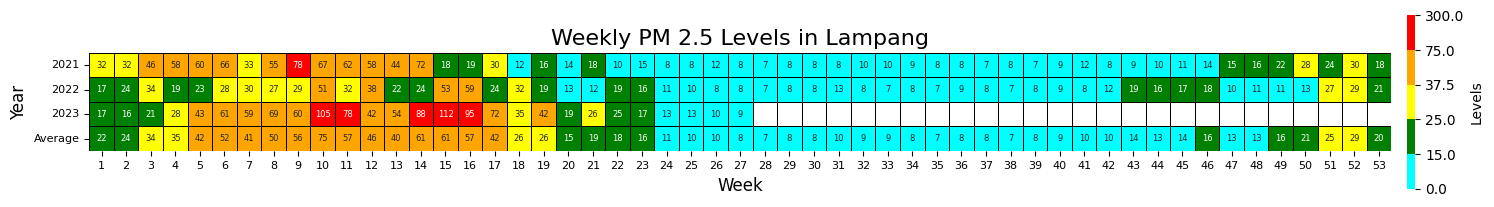

In [11]:
heatmap_PM(data = data, province = 'Lampang' , period = "W", shrink = 0.15, annot_size = 6)

In [15]:
def proportion_PM(data, region = 'All', start = "2021", li = 0, ui = 30, fontsize = 12):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    plt.style.use('seaborn-v0_8-bright')
    plt.rcParams['figure.figsize'] = [12,24 ]
    plt.rcParams['font.size'] = 12
    df = data.copy()
    df = df[dict_region[region]][start:]
    helper = df[dict_region[region]].columns[0]
    table = df[[helper]]

    # table['level'] = table[helper].apply(lambda x: 1 if x >= 0 and x <= 15 else (2 if x > 15 and x <= 25 else (3 if x > 25 and x <= 37.5 else (4 if x > 37.5 and x <= 75 else (5 if x > 75 else np.nan)))))
    table.loc[(table[helper] >= 0) & (table[helper]<= 15), 'level'] = 1
    table.loc[(table[helper] > 15) & (table[helper]<= 25), 'level'] = 2
    table.loc[(table[helper] > 25) & (table[helper]<= 37.5), 'level'] = 3
    table.loc[(table[helper] > 37.5) & (table[helper]<= 75), 'level'] = 4
    table.loc[(table[helper] >= 75), 'level' ] = 5
    table = table.groupby('level').count()
    for i in df.columns:
        if i != helper:
            t = df[[i]]
            t.loc[(t.loc[:,i] >= 0) & (t.loc[:,i]<= 15), 'level'] = 1
            t.loc[(t.loc[:,i] > 15) & (t.loc[:,i]<= 25), 'level'] = 2
            t.loc[(t.loc[:,i] > 25) & (t.loc[:,i]<= 37.5), 'level'] = 3
            t.loc[(t.loc[:,i] > 37.5) & (t.loc[:,i]<= 75), 'level'] = 4
            t.loc[(t.loc[:,i] >= 75), 'level' ] = 5
            # display(t)
            # t['level'] = t.loc[:,i].apply(lambda x: 1 if x >= 0 and x <= 15 else (2 if x > 15 and x <= 25 else (3 if x > 25 and x <= 37.5 else (4 if x > 37.5 and x <= 75 else (5 if x > 75 else np.nan)))))
            t = t.groupby('level').count()
            table = pd.merge(table,t, how = 'outer',left_index = True, right_index = True)

    table = table.T.rename(columns = {1: 'Excellent', 2 : 'Good', 3:'Moderate', 4:'Starting to affect Health', 5:'Affecting Health'})
    a = table
    table['total'] = table.sum(axis = 1)
    table = table.fillna(0)
    table['%Excellent'] = table['Excellent']/table['total']*100
    table['%Good'] = table['Good']/table['total']*100
    table['%Moderate'] = table['Moderate']/table['total']*100
    table['%Starting to affect Health'] = table['Starting to affect Health']/table['total']*100
    table['%Affecting Health'] = table['Affecting Health']/table['total']*100
    table_plot = table.iloc[:,6:]
    table_plot = table_plot.iloc[:,-2:]
    table_plot['total'] = table_plot.sum(axis = 1)
    table_plot = table_plot.sort_values(by = 'total', ascending = True)
    table_plot = table_plot.iloc[:,:-1]

    table_plot.plot(kind = 'barh',
                        stacked = True,
                        # color = ['cyan','green','yellow','orange','red'],
                        color = ['orange','red'],
                        edgecolor = 'black',
                           legend = True,
                           subplots =False
                           )
    plt.xticks(rotation = 90)
    table_plot['total'] = table_plot.sum(axis = 1)
    for i,j in enumerate(table_plot.iloc[:,-3]):
        if j > 3:
            plt.text(j*0.5,i,s =  f"{j:.2f}%", ha = 'center',va = 'center' ,rotation = 0, fontsize = fontsize)

    for i,j in enumerate(table_plot.iloc[:,-2]):
        val = (table_plot.iloc[:,-3][i] + (j/2))
        if j > 0.1:
            plt.text(val,i,s =  f"{j:.2f}%", ha = 'center',va = 'center', rotation = 0, fontsize = fontsize)

    for i,j in enumerate(table_plot.iloc[:,-1]):
        plt.text(j+1.5,i,s =  f"{j:.2f}%", ha = 'center',va = 'center', rotation = 0, fontsize = fontsize)

    # plt.ylim(li,ui)
    plt.title("\nThe proportion of days with high pollution levels.\n", fontsize= 22)
    plt.legend(loc = 'center right', fontsize = 12)
    # plt.tight_layout()
    plt.savefig("output.png", bbox_inches="tight")

    plt.show()
    return a

<ipython-input-15-a7fae17e38f5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.loc[(table[helper] >= 0) & (table[helper]<= 15), 'level'] = 1
<ipython-input-15-a7fae17e38f5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.loc[(t.loc[:,i] >= 0) & (t.loc[:,i]<= 15), 'level'] = 1
<ipython-input-15-a7fae17e38f5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

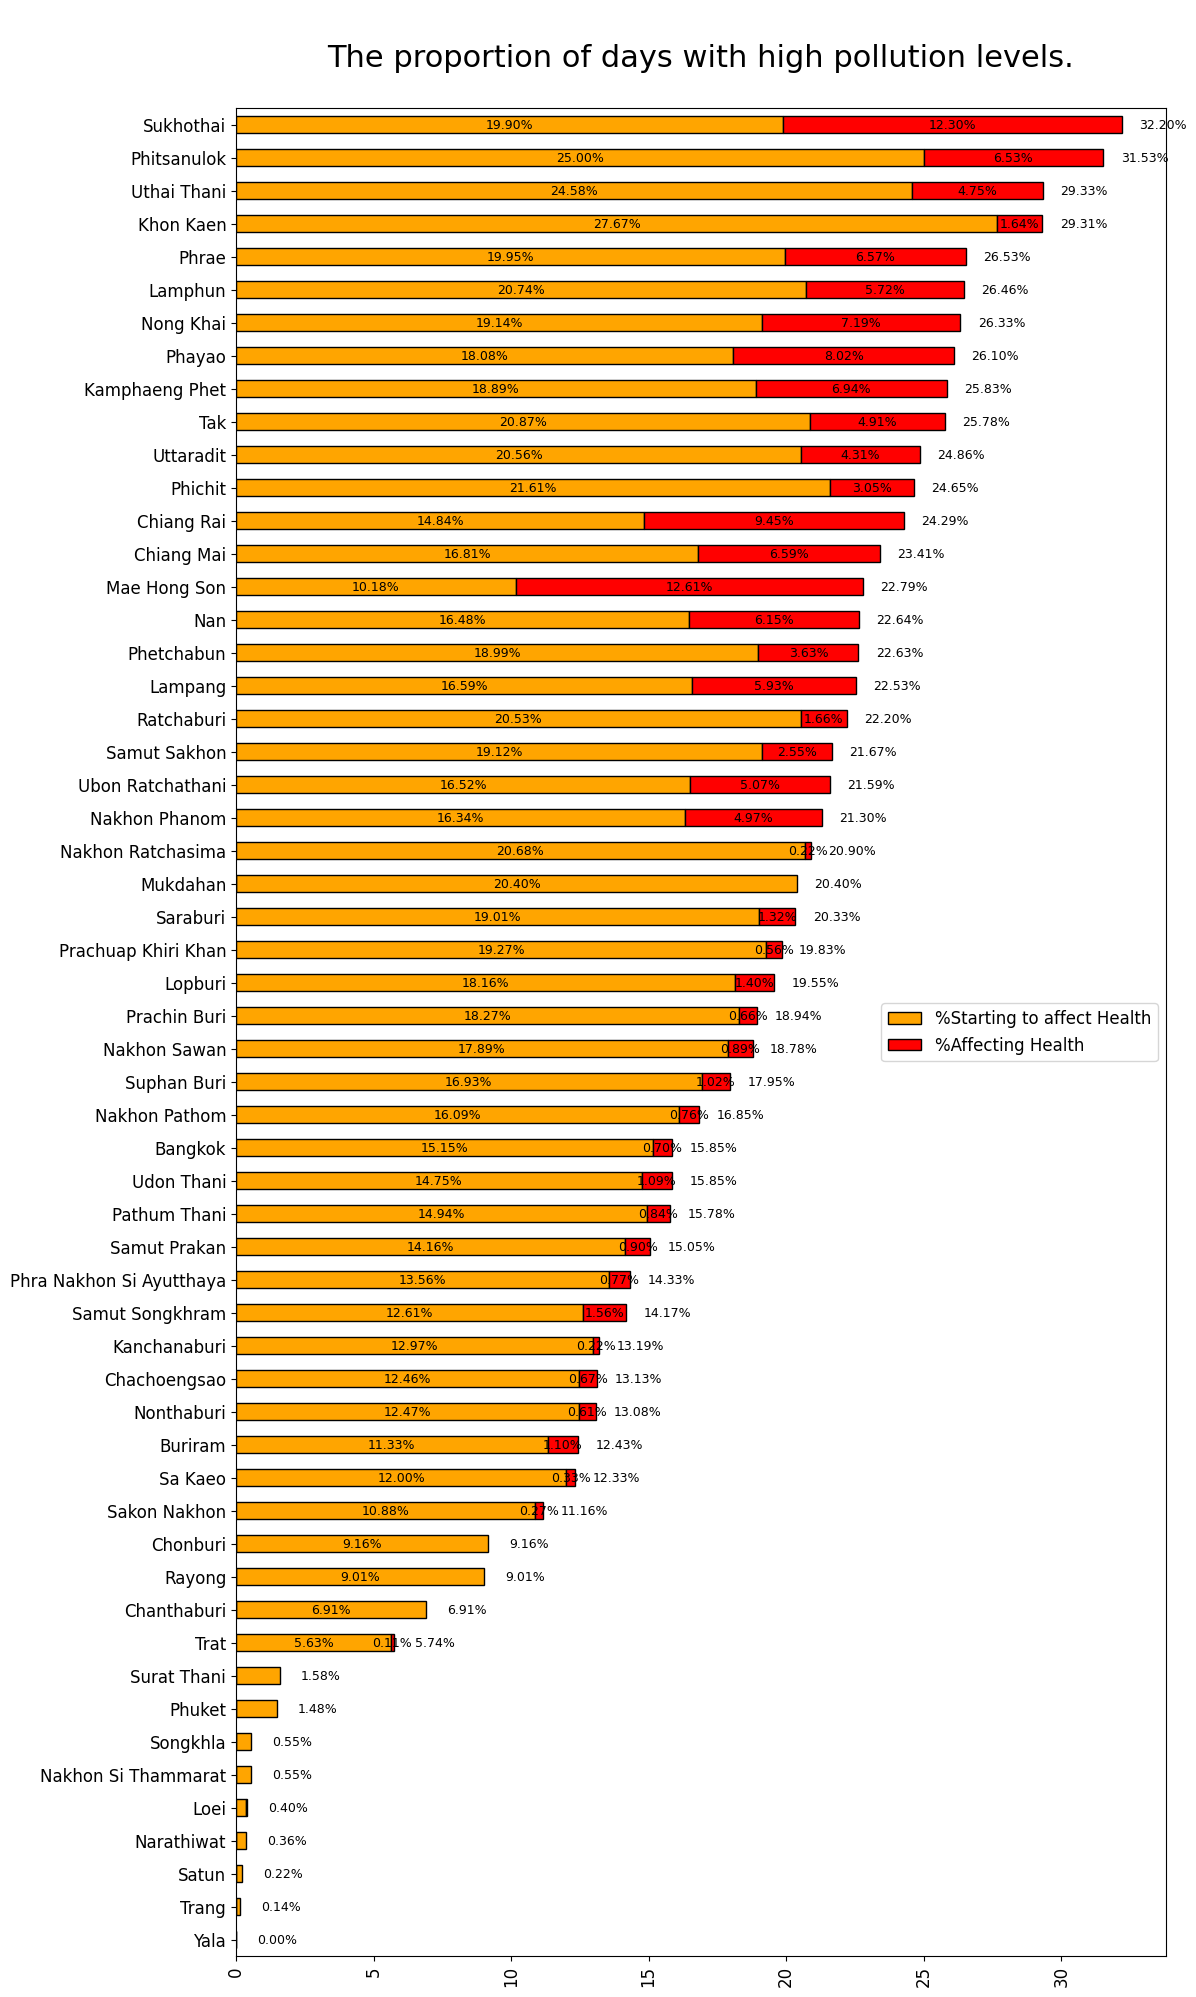

In [16]:
a = proportion_PM(data, region = 'All', start = "2018", ui = 50, fontsize = 9)

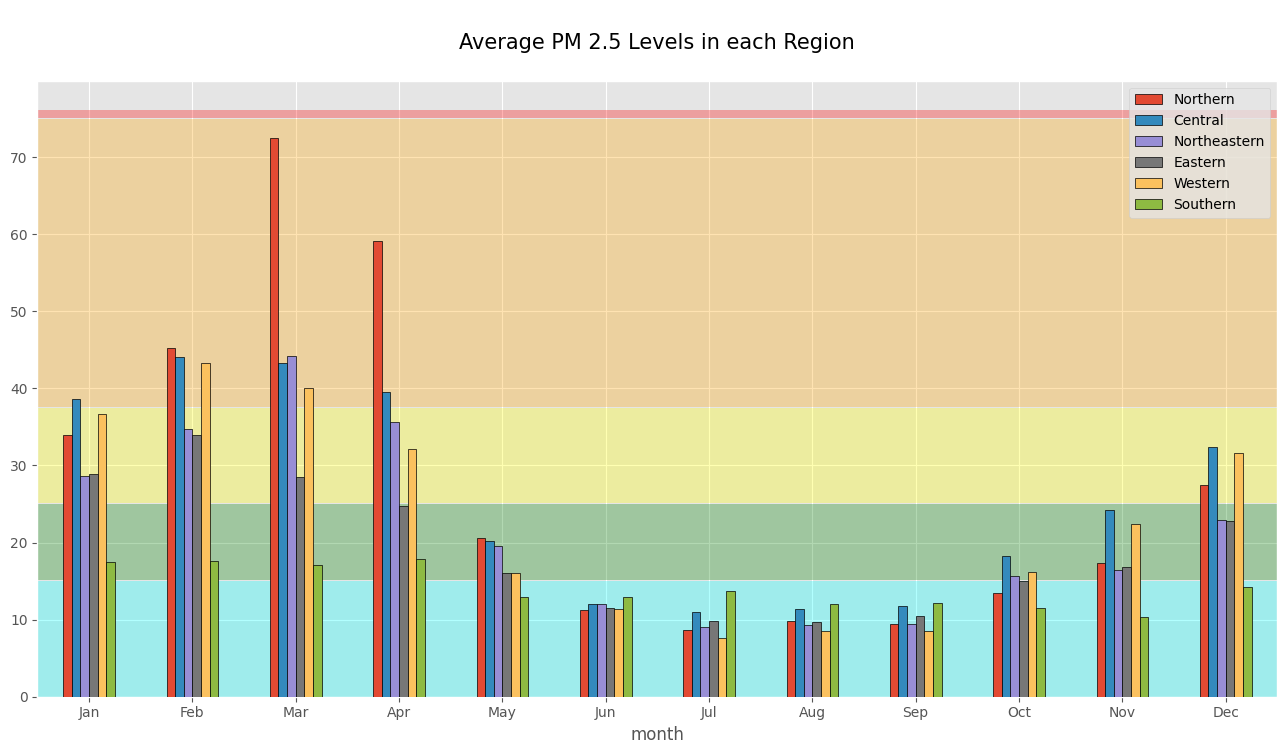

In [17]:
df = data.copy()
df2 = pd.DataFrame()
df['month'] = df.index.month

for i in dict_region.keys():
    if i != 'All':
        df2[f"{i}"] = df.groupby('month').mean()[dict_region[i]].mean(1)
plt.style.use('ggplot')
ax = df2.plot(kind = 'bar', stacked = False, edgecolor = 'black' ,zorder = 3, title="\nAverage PM 2.5 Levels in each Region\n", figsize = (16,8))
ax.title.set_size(15)
plt.xticks(rotation = 0)

ax.set_xticklabels(data.index.strftime("%b").unique().tolist())
ax.axhspan(75.1, plt.ylim()[1] , facecolor='red', alpha=0.3, label='Affecting Health')
ax.axhspan(37.6, 75.0, facecolor='orange', alpha=0.3, label='Starting to affect Health')
ax.axhspan(25.1, 37.5, facecolor='yellow', alpha=0.3, label='Moderate')
ax.axhspan(15.1, 25, facecolor='green', alpha=0.3, label='Good')
ax.axhspan(0, 15, facecolor='cyan', alpha=0.3, label='Excellent')

plt.show()

In [18]:
def count_PM(province = 'Bangkok'):
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 12
    df = data.copy()
    for i in df.columns:
        df[i] = df[i].apply(lambda x: 1 if x >= 0 and x <= 15 else (2 if x > 15 and x <= 25 else (3 if x > 25 and x <= 37.5 else (4 if x > 37.5 and x <= 75 else (5 if x > 75 else np.nan)))))
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day'] = df.index.day
    df = df[['Month','Year','Day', province]].groupby(['Month','Year',province]).count().reset_index()
    df.loc[df[province] < 4,'Count'] = 0
    df.loc[df[province] >= 4,'Count'] = df['Day']
    df = df.groupby(['Year','Month']).sum().reset_index().pivot(index = 'Year', columns = 'Month', values = 'Count')
    df.loc['Average'] = df.mean(axis = 0)

    import seaborn as sns
    sns.heatmap(df, cmap= 'RdYlGn_r', annot = True, fmt= '.2f', square = True, cbar = False, center = 0,)
    plt.title(f"\nNumber of Hazardous PM 2.5 Days in {province}\n ", fontsize = 16)
    plt.show()

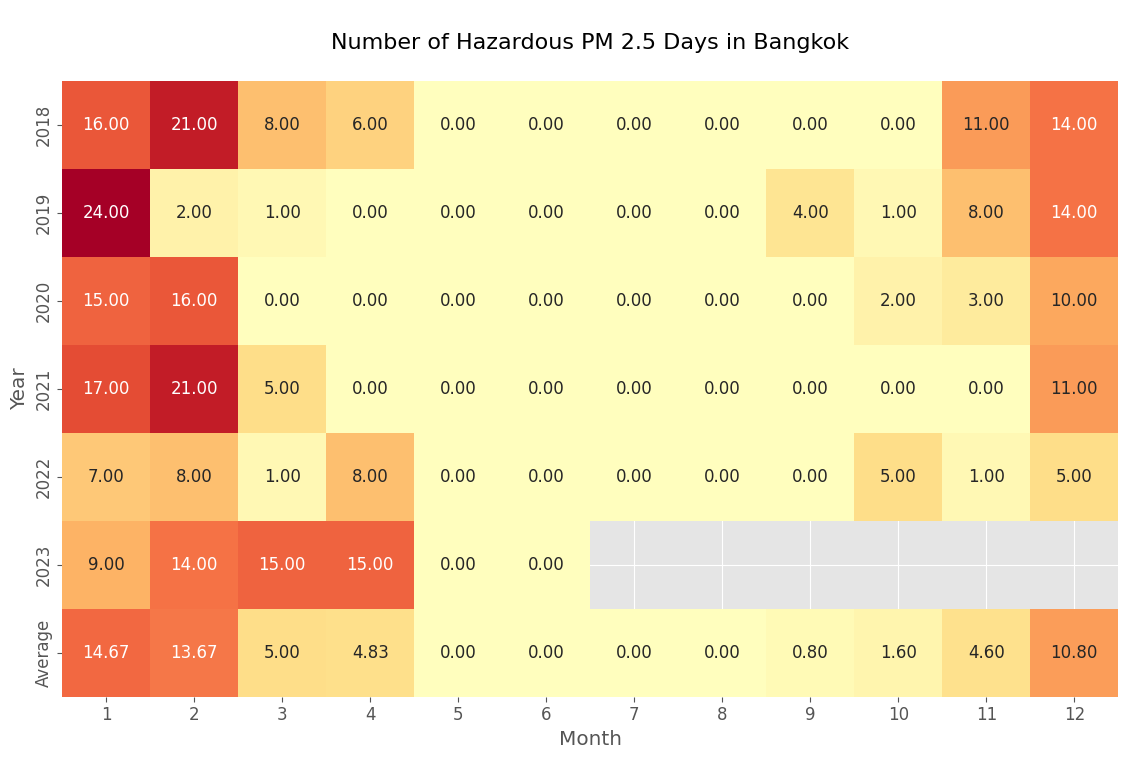

In [19]:
count_PM('Bangkok')

In [36]:
df = data.stack().reset_index()
df.set_index("Date", inplace = True)
df['Month'] = df.index.strftime("%m")
df['Year'] = df.index.strftime("%Y")
df["Day"] = df.index.strftime("%d")
df['Year-Month'] = df['Year'] + '-' + df['Month']

df.rename(columns = {'level_1': 'Province',0: 'PM 2.5'}, inplace = True)

num = df[['Year-Month','Day']].groupby(['Year-Month']).max()

df = pd.merge(df.drop(['Day'], axis = 1), num, how = "left", left_on = 'Year-Month', right_on = 'Year-Month')
df.rename(columns = {"Day": "Max Day"}, inplace = True)
df['Max Day'] = df['Max Day'].astype(int)

for_merge = data.stack().reset_index()
for_merge.set_index("Date", inplace = True)
for_merge['Month'] = for_merge.index.strftime("%m")
for_merge['Year'] = for_merge.index.strftime("%Y")
for_merge["Day"] = for_merge.index.strftime("%d")
for_merge.rename(columns = {'level_1': 'Province',0: 'PM 2.5'}, inplace = True)
for_merge = for_merge.groupby(["Year", "Month", "Day", "Province"]).last().reset_index()
for_merge['Count'] = for_merge['PM 2.5'].apply(lambda x: 1 if x >= 37.6 else 0)
for_merge = for_merge.drop(['Day','PM 2.5'], axis = 1).groupby(["Year", "Month","Province"]).sum()

df_show = pd.merge(df, for_merge, how = "left", left_on = ['Province','Year','Month'], right_on = ['Province','Year','Month'])#.reset_index()
df_show = df_show[df_show["Province"]== 'Bangkok'].drop(["Year-Month"], axis = 1)
df_show = df_show.groupby(['Province','Year','Month','Max Day', 'Count']).mean().reset_index()
df_show['PM 2.5'] * df_show['Max Day']

df_show['Year-Month'] = df_show['Year'] + '-' + df_show['Month']
df_show['Year'] = df_show['Year'].astype(str)
df_show['Month'] = df_show['Month'].astype(str)

import plotly.express as px
fig = px.scatter(df_show,"PM 2.5",'Count', color = 'Month', symbol = 'Year', size = 'Size', template = "plotly", width =1260 , height = 900)
for i,j,k,l in zip(df_show['PM 2.5'], df_show['Count'], df_show['Year'], df_show['Month']):
    fig.add_annotation(x = i, y = j, text = f"{k}-{l}" )
fig.update_layout(showlegend = True, title = f"Bangkok 2018 - 2023")
for trace in fig.data:
    if trace.legendgroup == 'Month':
        trace.showlegend = False
    else:
        trace.showlegend = True
fig.show()

## Clean Tourist Data

In [24]:
test = pd.read_csv('/content/drive/MyDrive/DADS5001_Tools/Project/tourist.csv')
test = test.groupby(['Month','Province']).last().reset_index()

In [25]:
for i in dict_region['All'] :
    if i not in df.Province.unique():
        print(i)

In [26]:
def barplot_tourist(data_pm, data_tour ,province = 'Bangkok', year = 2022):
    plt.rcParams['figure.figsize'] = [24, 8]
    # plt.rcParams['font.size'] = 12
    df = data_pm.copy()
    df['Month'] = df.index.strftime("%m")
    year = str(year)
    t0 = df[year:year].groupby('Month').mean()[[province]]
    t0.index = t0.index.astype(int)

    t1 = test.pivot(index = "Month", columns = "Province", values = f'Thai Visitors (persons)-{year}' )[[province]]
    t2 = test.pivot(index = "Month", columns = "Province", values = f'Foreign Visitors (persons)-{year}' )[[province]]
    t1.rename(columns = {f'{province}' : f'Thai Visitors (persons)-{year}'}, inplace = True)
    t2.rename(columns = {f'{province}'  : f'Foreign Visitors (persons)-{year}'}, inplace = True)
    t0.rename(columns = {f'{province}': f"{province} PM 2.5 Levels"}, inplace = True)
    merge = t0.merge(t1, how = 'outer', left_index = True, right_index = True).merge(t2,
            how = 'outer', left_index = True, right_index = True, )

    merge.plot( kind = 'line', ls = '-', subplots = True ,marker = 'o',
               title = f"\nTourist Numbers vs PM 2.5 Levels  in {province} {year} \n",
                xticks = np.arange(1,13,1))
    plt.savefig(f"{province}_{year}.png", bbox_inches="tight")


    plt.show()

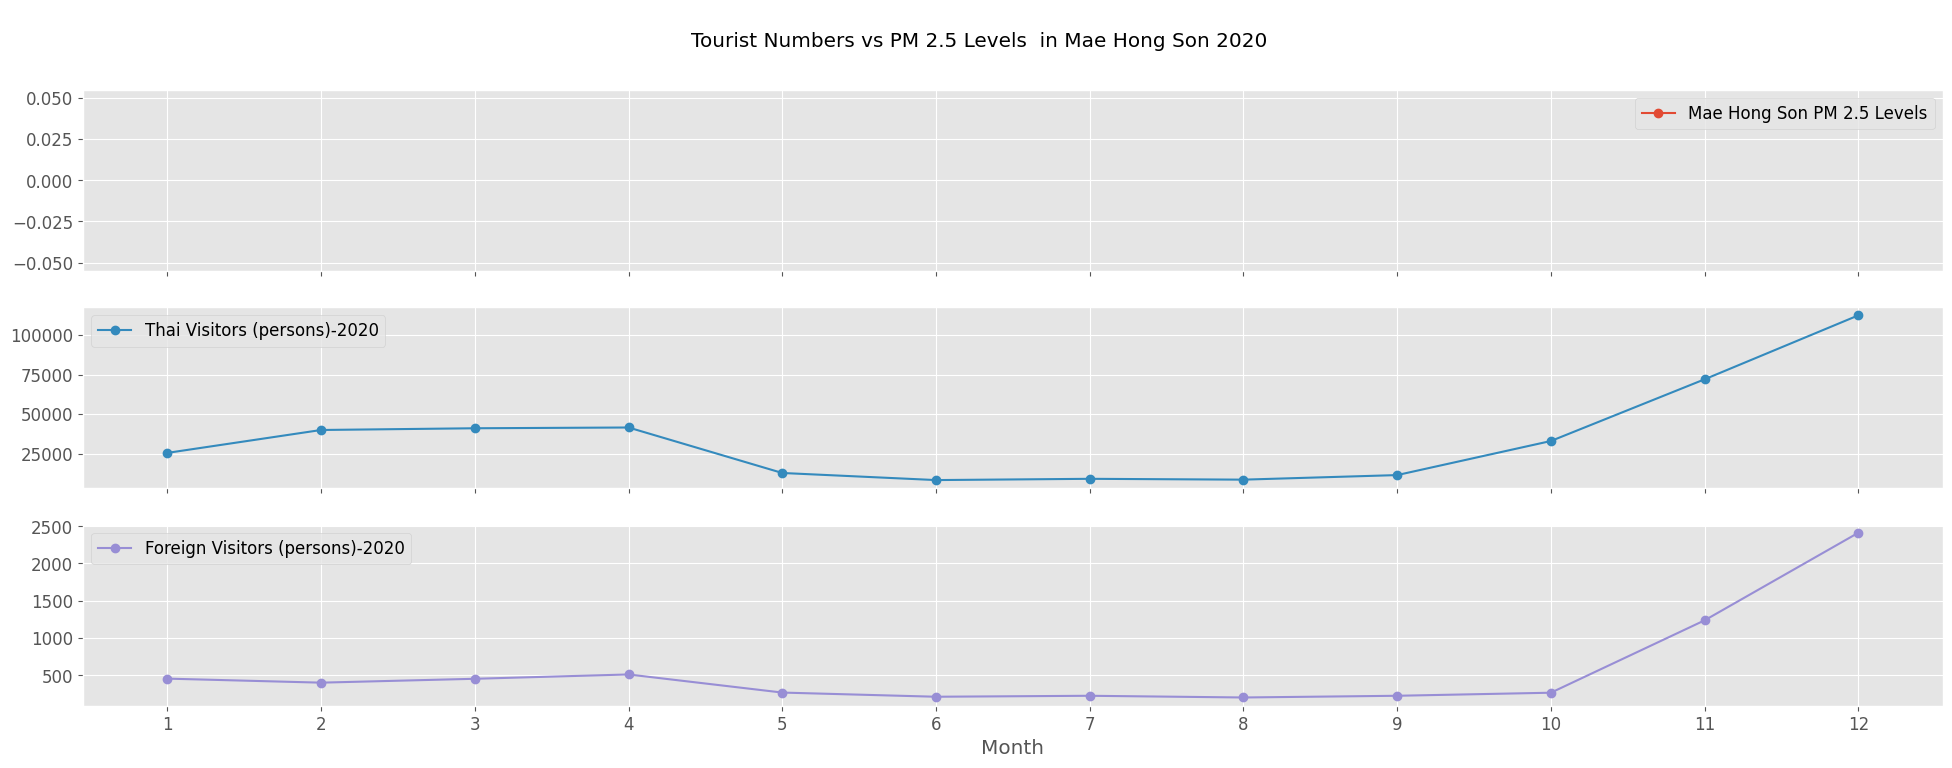

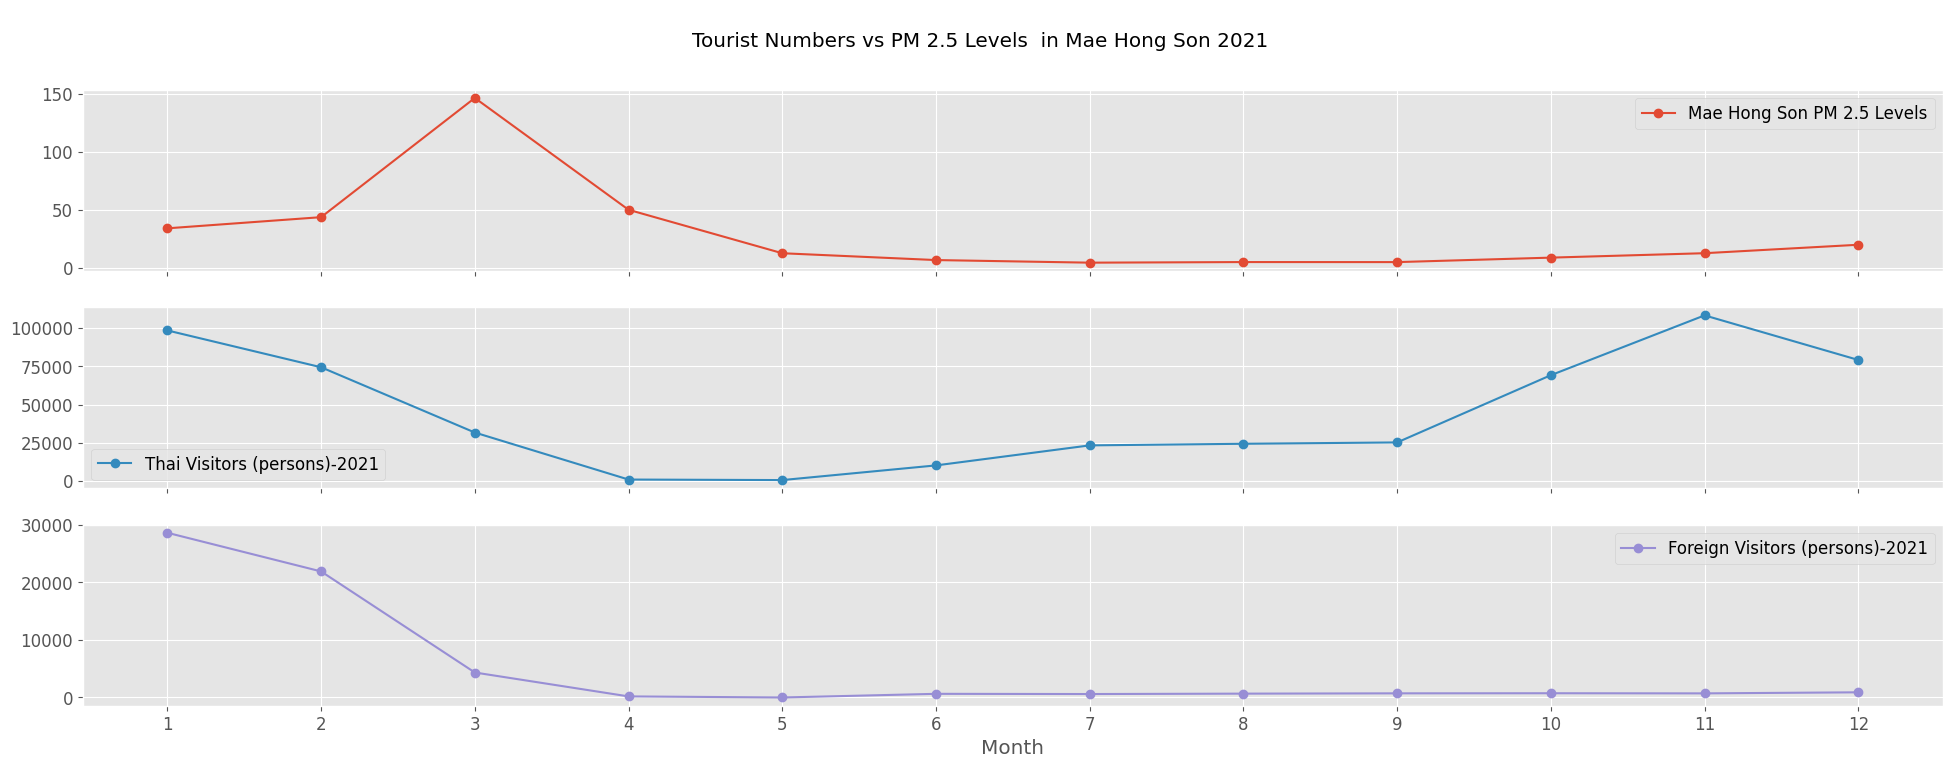

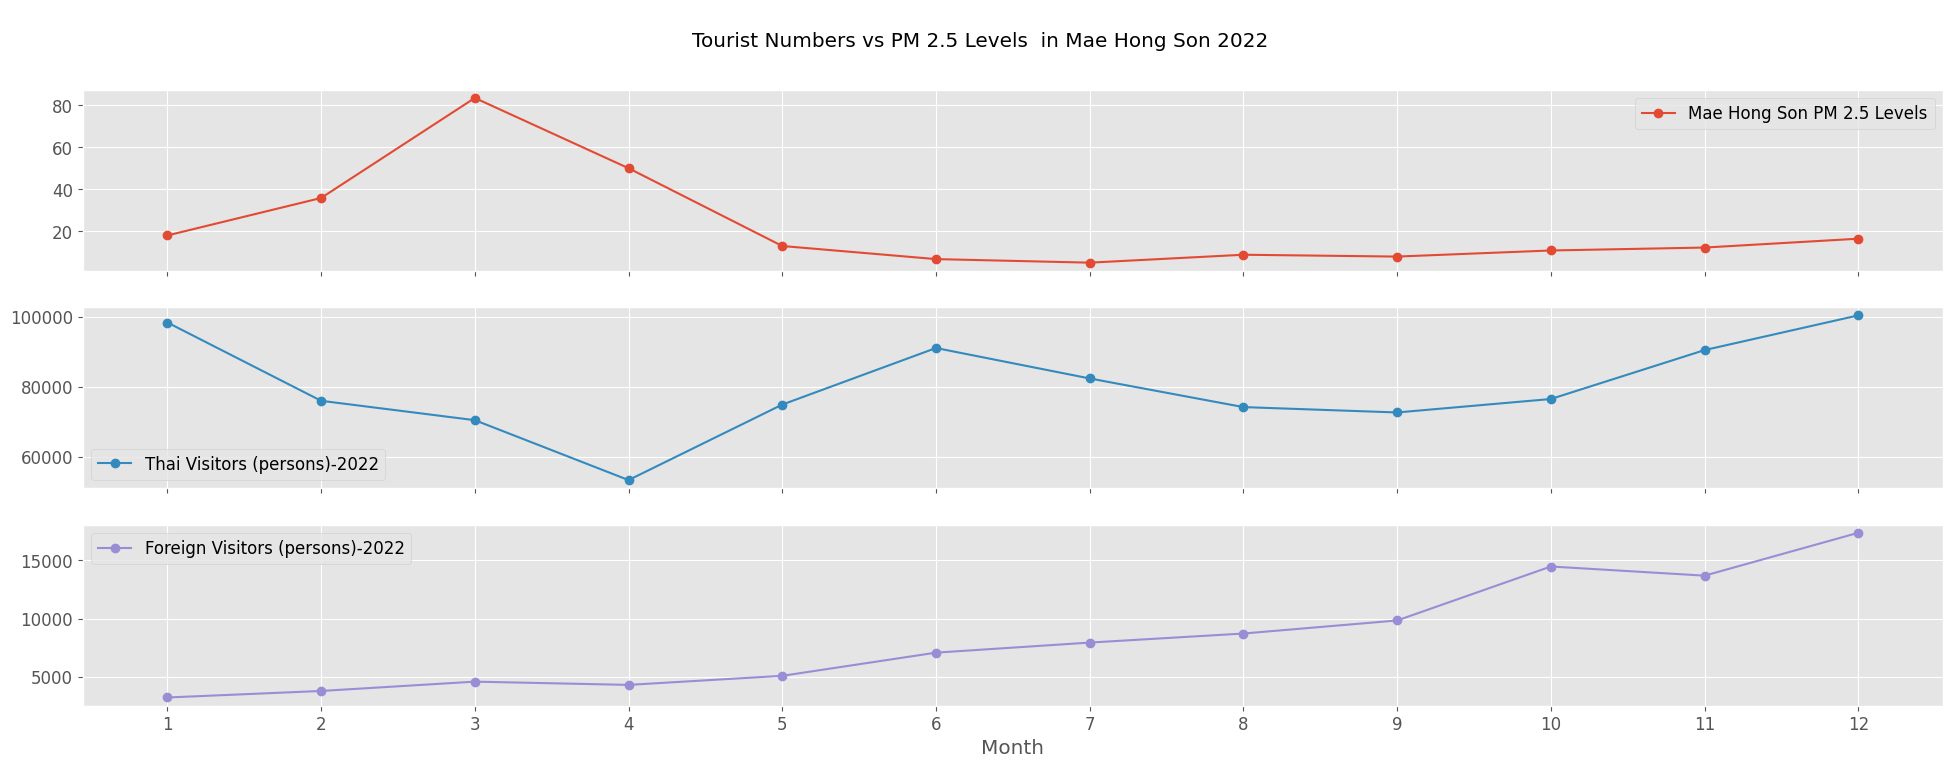

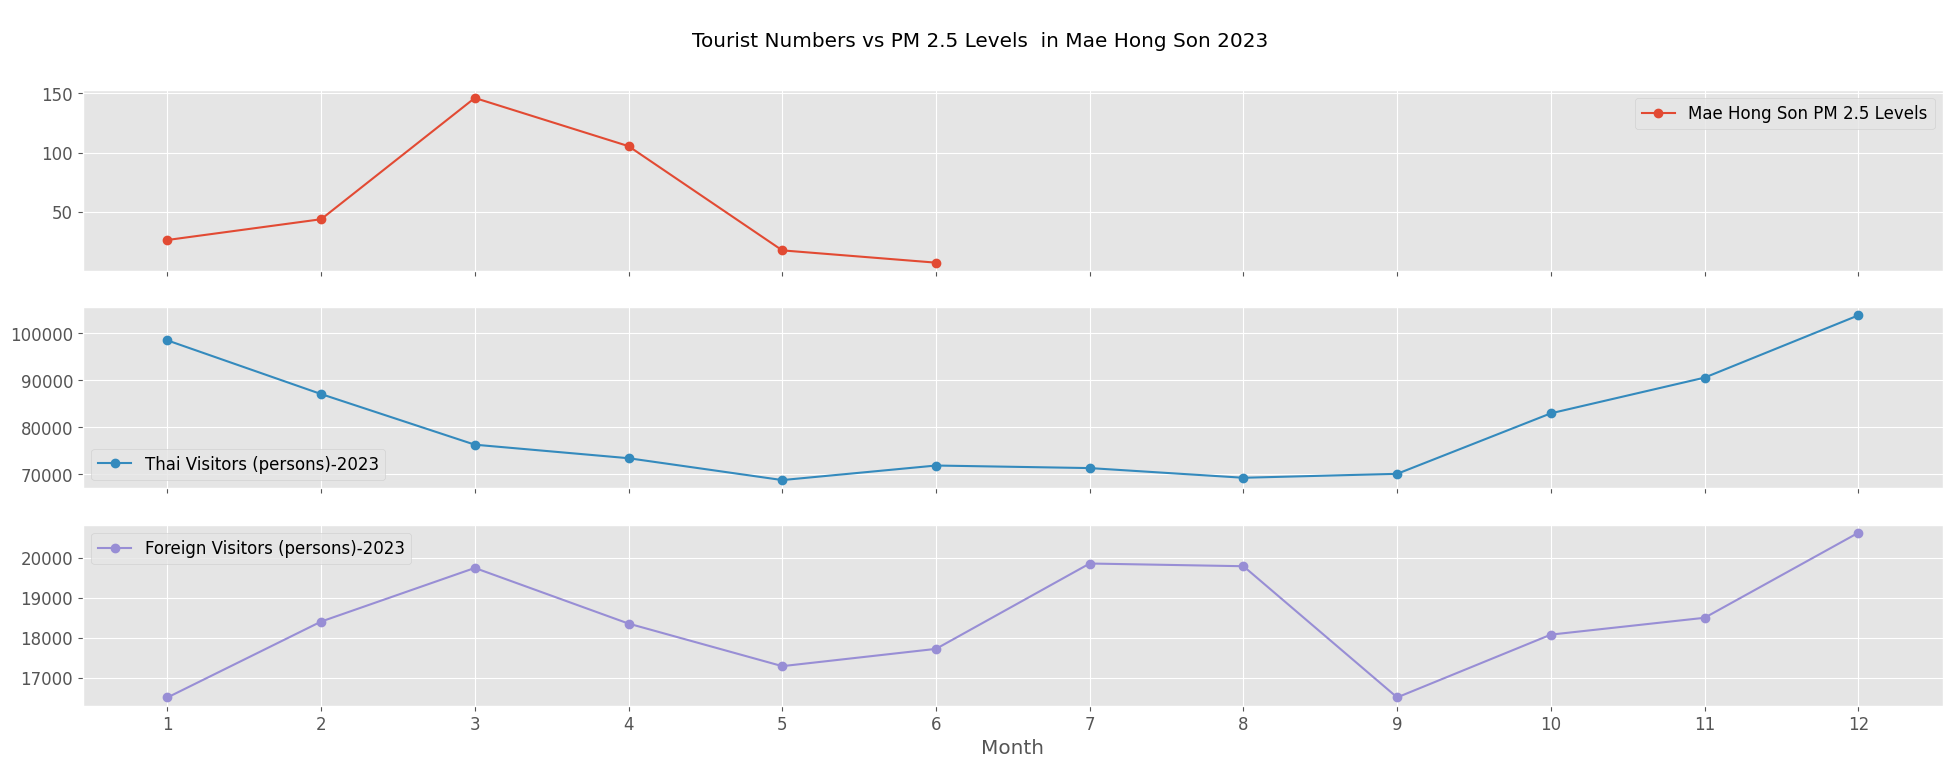

In [27]:
for i in range(2020, 2024, 1):
    barplot_tourist(data_pm = data , data_tour = test ,province = "Mae Hong Son", year = i)